## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## Data Description:
### Murder -- Muder rates in different places of United States
### Assualt- Assualt rate in different places of United States
### UrbanPop - urban population in different places of United States
### Rape - Rape rate in different places of United States

###  Importing Required Libraries & Datasets

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

### Exploratory Data Analysis

In [51]:
crime = pd.read_csv('C:\Vishal\ExcelR\Data Science\Assignments\crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [52]:
# Normalizing the data
crime_num =  crime.iloc[:,1:]
crime_norm = pd.DataFrame(normalize(crime_num),columns=crime_num.columns)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [53]:
crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


## Hierarchical clustering

### Importing libraries for DBSCAN & creating copy of dataset

In [59]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
from sklearn.cluster import AgglomerativeClustering

In [56]:
crime1 = crime.copy()
crime_norm1 = crime_norm.copy()

In [57]:
z = linkage(crime_norm1, method="complete",metric="euclidean")

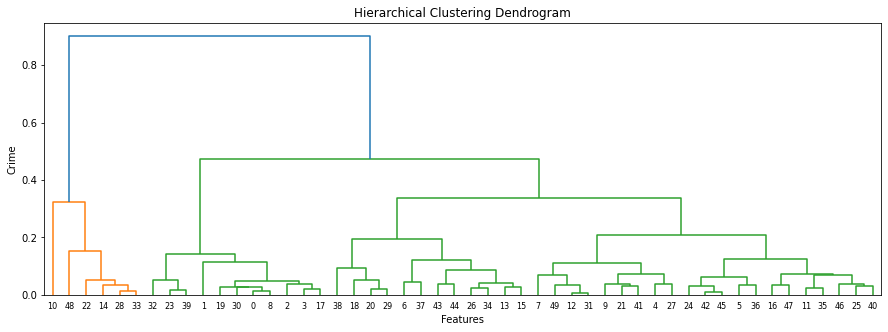

In [58]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [61]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [62]:
y=pd.DataFrame(hclusters.fit_predict(crime_norm1),columns=['Clusters'])
y['Clusters'].value_counts()

0    20
1    12
3    12
2     5
4     1
Name: Clusters, dtype: int64

In [63]:
# Adding clusters to a copy of dataset
crime1['Clusters']=hclusters.labels_
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [64]:
crime1.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.760000,255.550000,66.100000,27.090000
1,1,4.758333,116.583333,70.083333,15.683333
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.783333,141.583333,61.833333,21.466667
4,4,5.300000,46.000000,83.000000,20.200000


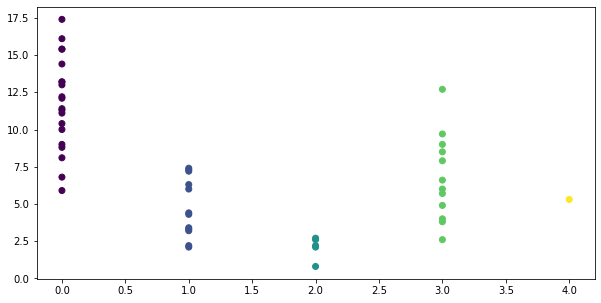

In [66]:
# Plot Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(crime1['Clusters'],crime1['Murder'], c=hclusters.labels_)

## k-means Clustering

### Importing Libraries for k-means & creating copy of datasets

In [67]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 

In [68]:
crime2 = crime.copy()
crime_norm2 = crime_norm.copy()

In [69]:
crime2.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [70]:
# Screw plot or Elbow curve ############
k = list(range(2,15))

In [71]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(crime_norm2)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(crime_norm2.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,crime_norm2.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x1f159e82280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

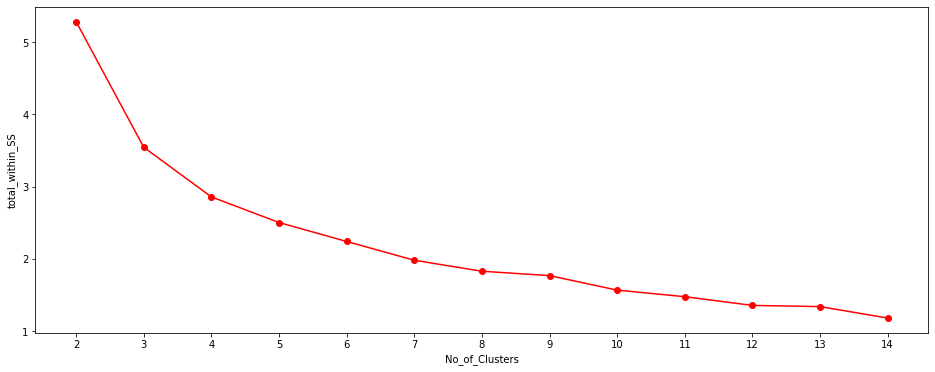

In [72]:
# Scree plot 
plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [73]:
# The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(crime_norm2)

KMeans(n_clusters=4)

In [74]:
KMeans(algorithm ='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=4, n_jobs=None, precompute_distances='auto')

In [75]:
# Getting the labels of clusters assigned to each row 
model.labels_ 

array([0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 3, 0, 2, 1, 2, 3, 0, 2, 0, 2, 0,
       1, 0, 3, 3, 2, 0, 1, 2, 0, 0, 0, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 2,
       2, 3, 3, 3, 1, 3])

In [76]:
model.cluster_centers_

array([[0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689]])

In [77]:
X = crime2[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_
crime2['Crime_clusters'] = clusters.labels_
crime2.head()
crime2.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [78]:
stats =crime2.sort_values("Murder", ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,2
28,New Hampshire,2.1,57,56,9.5,2
18,Maine,2.1,83,51,7.8,2
14,Iowa,2.2,56,57,11.3,2
44,Vermont,2.2,48,32,11.2,2
48,Wisconsin,2.6,53,66,10.8,2
11,Idaho,2.6,120,54,14.2,0
22,Minnesota,2.7,72,66,14.9,2
43,Utah,3.2,120,80,22.9,0
6,Connecticut,3.3,110,77,11.1,0


In [83]:
# Grouping data by Clusters (k=4)
crime2.groupby('Crime_clusters').agg(['mean']).reset_index()

,Crime_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.590000,112.400000,65.600000,17.270000
1,1,11.812500,272.562500,68.312500,28.375000
2,2,2.950000,62.700000,53.900000,11.510000
3,3,8.214286,173.285714,70.642857,22.842857


C:\Users\chaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


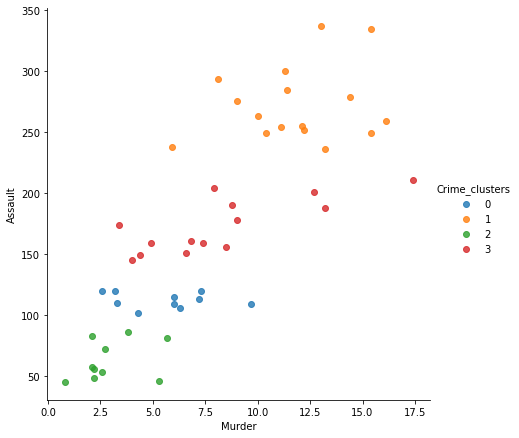

In [79]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=crime2,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

C:\Users\chaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


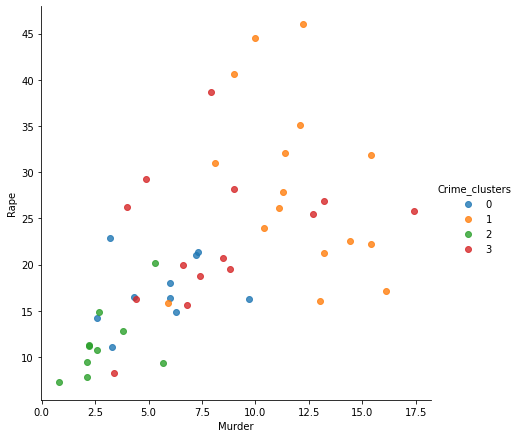

In [80]:
# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=crime2,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

C:\Users\chaud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


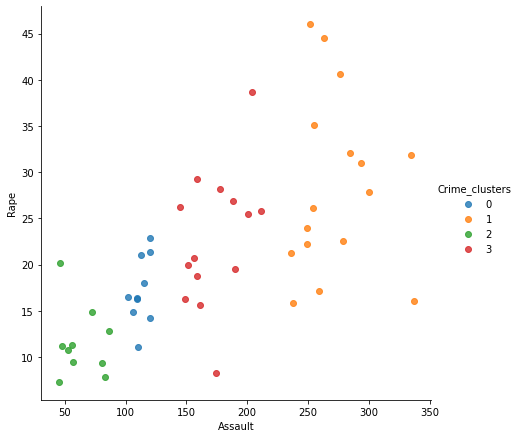

In [81]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=crime2,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

## DBSCAN

### Importing libraries for DBSCAN & creating copy of dataset

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [95]:
crime3 = crime.copy()
crime_norm3 = StandardScaler().fit_transform(crime_num)
crime_norm3

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [96]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm3)

DBSCAN(eps=1, min_samples=4)

In [97]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [98]:
# Making clusters column 
Clusters = pd.DataFrame(dbscan.labels_,columns=['clusters'])
Clusters

,clusters
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [100]:
# Adding clusters the to dataset
crime3['Clusters']=dbscan.labels_
crime3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [101]:
crime3.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


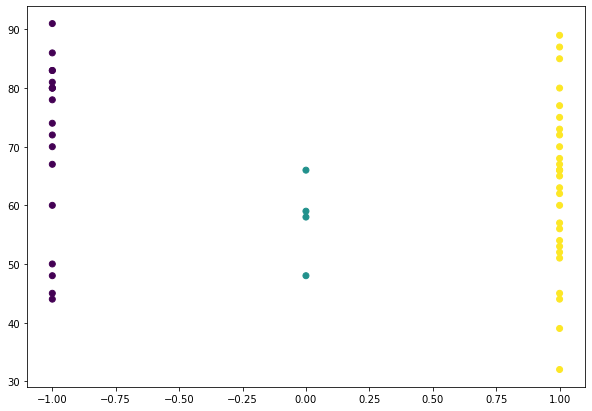

In [102]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['Clusters'],crime3['UrbanPop'], c=dbscan.labels_)

### Inference

> Cluster 3 - south western states (however, definition changes for different sources) maxes out in three (Assault, Urbanpop, Rape) out of four crimes.

> Cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes
Coincidentally, most of the southern region states belong to cluster 2 where Murders seems to be popular.

> The southern states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states (half of mid-western states) in cluster 2 in spite of the average Urbanpop (%) being very close. For causality, more variables are needed apart from the number of arrests to understand the inferences like the above. For instance, it could be the density of people or number of people with a different socio-economic statuses in that state.